# Modelling Gradient Descent

Here we will create a simple algorithm that uses gradient descent to optimise a simple linear regression model. 
The data are fetched from the [BOM](http://www.bom.gov.au/climate/data/index.shtml) and show temperatures for the Sydney (Kinsford Smith) and Newcastle (Williamstown RAAF) airports. 

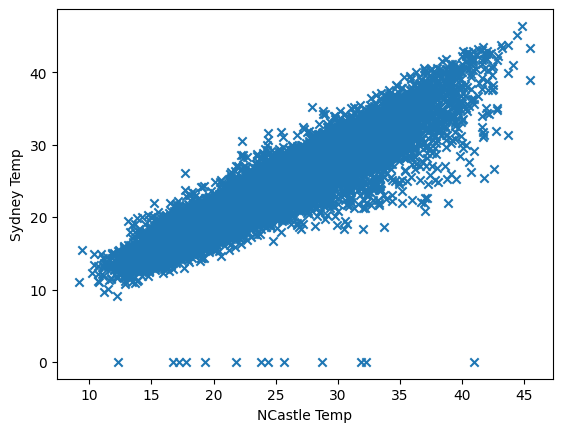

,DDMMYYYY,MaxTempNewcastleAirport,MaxTempSydneyAirport
252,19420910,18.6,16.2
253,19420911,18.8,17.1
254,19420912,18.9,14.9
255,19420913,19.6,20.2
256,19420914,23.8,24.3


In [1]:
# Import dependancies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load the dataset
fulldataset = pd.read_csv('../datasets/AirportTemps.csv')
dataset = fulldataset.dropna()

# Plot the data (to observe correlation)
plt.scatter(dataset['MaxTempNewcastleAirport'],
            dataset['MaxTempSydneyAirport'],marker='x')
plt.xlabel('NCastle Temp')
plt.ylabel('Sydney Temp')
plt.show()

# See a sample of raw data
dataset.head()

Here's the beginnings of an OOP approach. It plots the existing data in blue and the predicted line in red. 


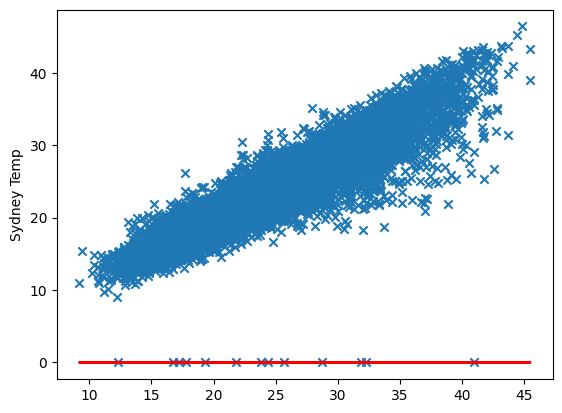

Training cycle 0: m = 0.00, b = 0.00
  Current loss = 531.27, loss if b increased to 11.52 = 145.07, loss if b decreased to -11.52 = 1183.11
        Increase by 11.52
Cycle 0 complete: m = 0.00, b = 11.52


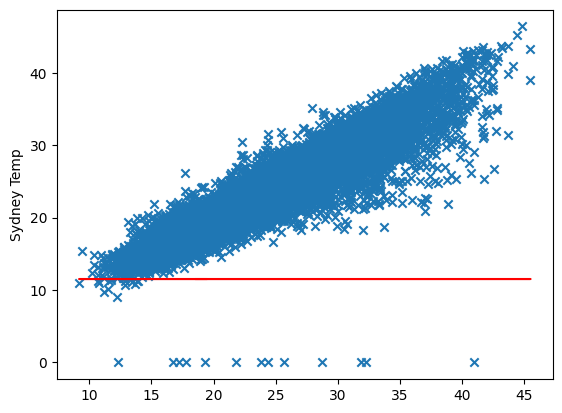

Training cycle 1: m = 0.00, b = 11.52
  Current loss = 145.07, loss if b increased to 17.55 = 48.93, loss if b decreased to 5.50 = 313.74
        Increase by 6.02
Cycle 1 complete: m = 0.00, b = 17.55


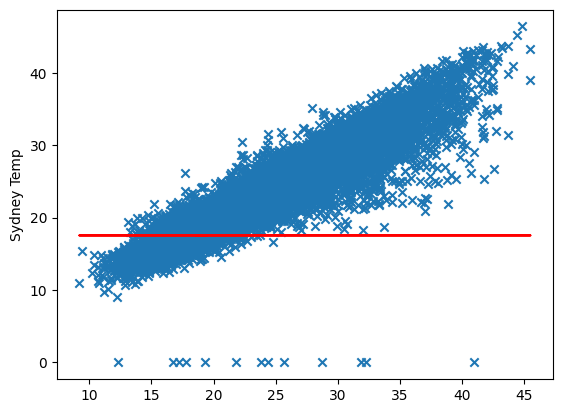

Training cycle 2: m = 0.00, b = 17.55
  Current loss = 48.93, loss if b increased to 21.04 = 26.39, loss if b decreased to 14.05 = 95.93
        Increase by 3.50
Cycle 2 complete: m = 0.00, b = 21.04


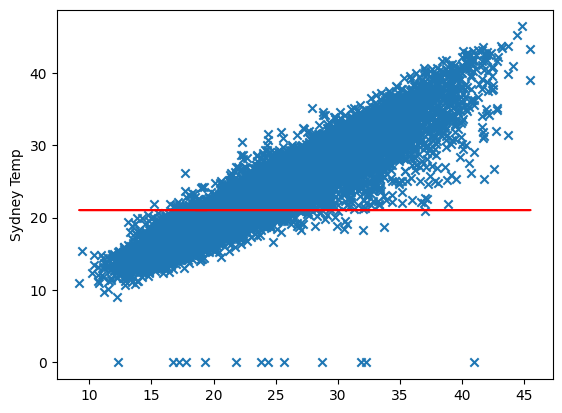

Training cycle 3: m = 0.00, b = 21.04
  Current loss = 26.39, loss if b increased to 23.61 = 25.41, loss if b decreased to 18.48 = 40.55
        Increase by 2.57
Cycle 3 complete: m = 0.00, b = 23.61


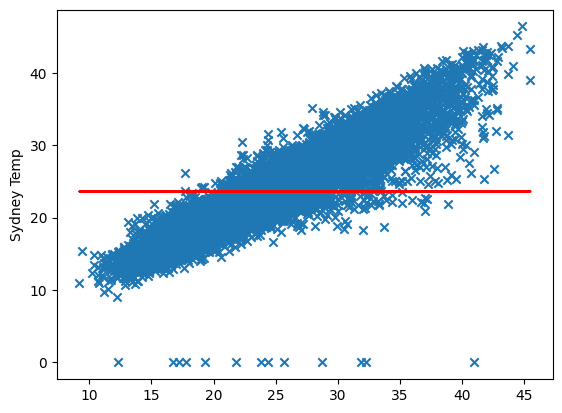

Training cycle 4: m = 0.00, b = 23.61
  Current loss = 25.41, loss if b increased to 26.13 = 37.29, loss if b decreased to 21.09 = 26.25
Cycle 4 complete: m = 0.00, b = 23.61


In [3]:
class Model():
    def __init__(self, data):
        self.dataset = data
        self.m = 0
        self.b = 0
        self.learning_rate = .05
        self.cycles = 5

    def plot(self):
        predictions = self.predict()
        plt.scatter(self.dataset['MaxTempNewcastleAirport'],dataset['MaxTempSydneyAirport'],marker='x')
        plt.plot(self.dataset['MaxTempNewcastleAirport'],predictions, 'r')
        plt.ylabel('Sydney Temp')
        plt.show()

    def predict(self, m=None, b=None):
        if not m: 
            m = self.m
        if not b:
            b = self.b
        predictions = [x * m + b for x in dataset['MaxTempNewcastleAirport']]
        return predictions
    
    def loss(self, m=None, b=None):
        if not m: #This allows us to pass in m and b if desired, using the model's existing m and b as a fallback. 
            m = self.m
        if not b:
            b = self.b
        predictions = self.predict(m=m,b=b)
        loss = self.dataset['MaxTempSydneyAirport'] - predictions
        loss_squared = loss * loss
        mse = loss_squared.mean()
        return mse
    
    def decide_on_change_in_b(self):
        current_loss = self.loss()
        delta = math.sqrt(current_loss) * self.learning_rate * 10
        loss_if_b_increased = self.loss(b=(self.b + delta))
        loss_if_b_decreased = self.loss(b=(self.b - delta))
        print(f'  Current loss = {current_loss:.2f}, loss if b increased to {(self.b + delta):.2f} = {loss_if_b_increased:.2f}, loss if b decreased to {(self.b - delta):.2f} = {loss_if_b_decreased:.2f}')

        if loss_if_b_increased < current_loss:
            print(f'        Increase by {delta:.2f}')
            return delta
        elif loss_if_b_decreased < current_loss:
            print(f'        Decrease b by {delta:.2f}')
            return -delta
        else:
            return 0
    
    def decide_on_change_in_m(self):
        return 0
    
    def train(self):
        for i in range(self.cycles):
            self.plot()
            print(f'Training cycle {i}: m = {self.m:.2f}, b = {self.b:.2f}')
            self.b = self.b + self.decide_on_change_in_b()
            self.m = self.m + self.decide_on_change_in_m()
            print(f'Cycle {i} complete: m = {self.m:.2f}, b = {self.b:.2f}')

model = Model(dataset)
model.train()
